
***Reference***

https://www.kaggle.com/pyjune/eda-to-prediction-dietanic-daniel-park-kor-eng

# Import Data

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/심장 질환 예측 경진대회/data')

In [ ]:
os.listdir()

['test.csv',
 'train.csv',
 'sample_submission.csv',
 '.ipynb_checkpoints',
 'submission1.csv',
 'submission3.csv',
 'submission4.csv',
 'submission2.csv',
 'rf_best_params.csv',
 'submission5.csv',
 'submission8.csv',
 'submission6.csv',
 'submission9.csv',
 'submission7.csv',
 'submission10.csv',
 'submission11.csv',
 'submission12.csv']

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
2,3,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,4,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
4,5,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


**id**: 데이터 고유 id

**age**: 나이

**sex**: 성별 (여자 = 0, 남자 = 1)

**cp**: 가슴 통증(chest pain) 종류 

0 : asymptomatic 무증상
1 : atypical angina 일반적이지 않은 협심증
2 : non-anginal pain 협심증이 아닌 통증
3 : typical angina 일반적인 협심증

**trestbps**: (resting blood pressure) 휴식 중 혈압(mmHg)

**chol**: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)

**fbs**: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)

**restecg**: (resting electrocardiographic) 휴식 중 심전도 결과 
0: showing probable or definite left ventricular hypertrophy by Estes' criteria
1: 정상
2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**thalach**: (maximum heart rate achieved) 최대 심박수

**exang**: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)

**oldpeak**: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강

**slope**: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
0: downsloping 하강
1: flat 평탄
2: upsloping 상승

**ca**: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
Null 값은 숫자 4로 인코딩됨 

**thal**: thalassemia 지중해빈혈 여부
0 = Null 
1 = normal 정상
2 = fixed defect 고정 결함
3 = reversable defect 가역 결함

**target**: 심장 질환 진단 여부
0: < 50% diameter narrowing
1: > 50% diameter narrowing


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        151 non-null    int64  
 1   age       151 non-null    int64  
 2   sex       151 non-null    int64  
 3   cp        151 non-null    int64  
 4   trestbps  151 non-null    int64  
 5   chol      151 non-null    int64  
 6   fbs       151 non-null    int64  
 7   restecg   151 non-null    int64  
 8   thalach   151 non-null    int64  
 9   exang     151 non-null    int64  
 10  oldpeak   151 non-null    float64
 11  slope     151 non-null    int64  
 12  ca        151 non-null    int64  
 13  thal      151 non-null    int64  
 14  target    151 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 17.8 KB


In [ ]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [ ]:
train.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,43.734045,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,1.000000,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,76.000000,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,113.500000,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,151.000000,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


# How many people have heart disease?

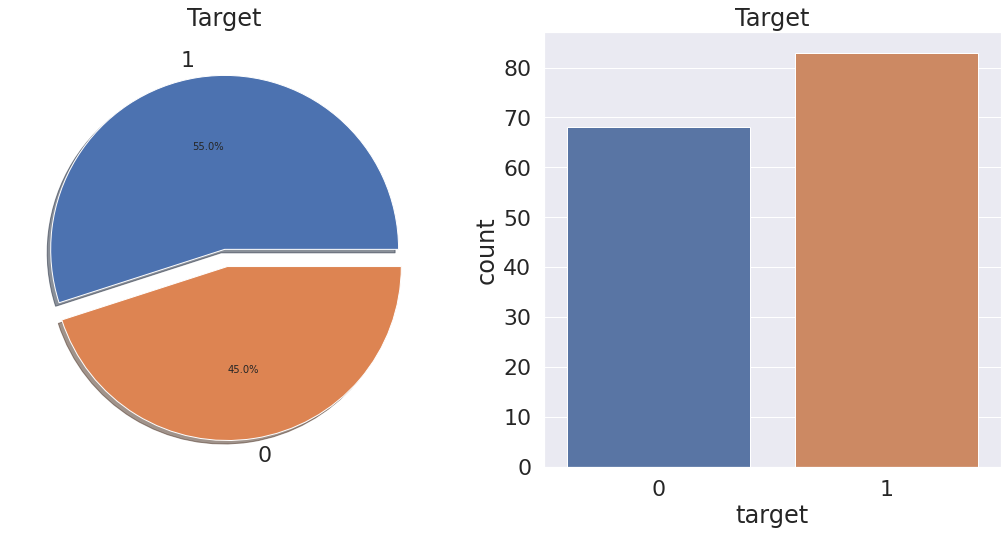

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train['target'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

ax[0].set_title('Target')
ax[0].set_ylabel('')

sns.countplot('target', data=train, ax=ax[1])
ax[1].set_title('Target')
plt.show()

심장 질환을 가지고 있는 분이 조금 더 많지만 큰 차이는 아니네요~~

***Let's check Chest Pain(cp)***


0 : asymptomatic 무증상

1 : atypical angina 일반적이지 않은 협심증

2 : non-anginal pain 협심증이 아닌 통증

3 : typical angina 일반적인 협심증

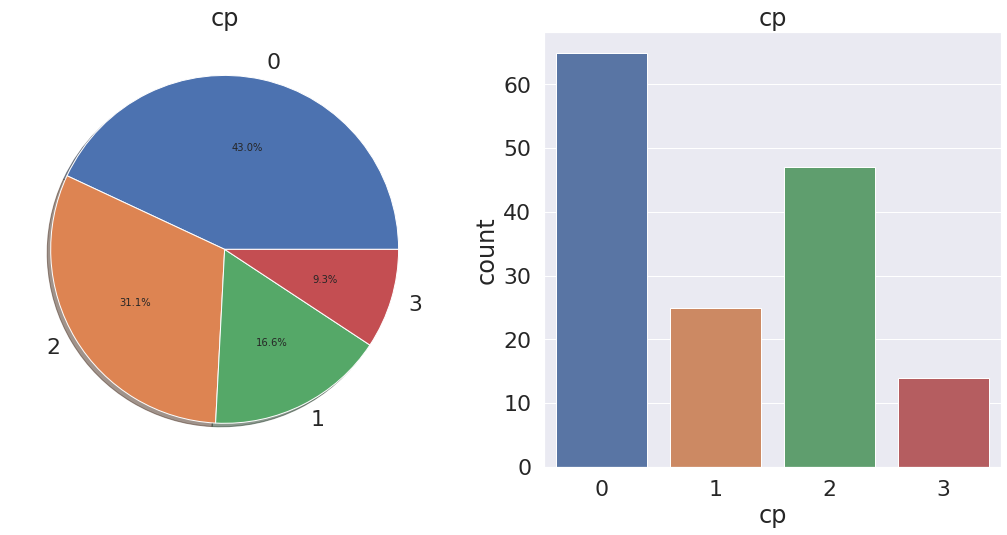

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train['cp'].value_counts().plot.pie(shadow=True, autopct='%1.1f%%', ax=ax[0])

ax[0].set_title('cp')
ax[0].set_ylabel('')

sns.countplot('cp', data=train, ax=ax[1])
ax[1].set_title('cp')
plt.show()

무증상이 가장 많네요,..

***let's see cp & target***

In [ ]:
train.groupby(['cp', 'target'])['target'].count()

cp  target
0   0         48
    1         17
1   0          7
    1         18
2   0          8
    1         39
3   0          5
    1          9
Name: target, dtype: int64

In [ ]:
train[['cp', 'target']].groupby(['cp']).mean()

,target
cp,
0,0.261538
1,0.720000
2,0.829787
3,0.642857


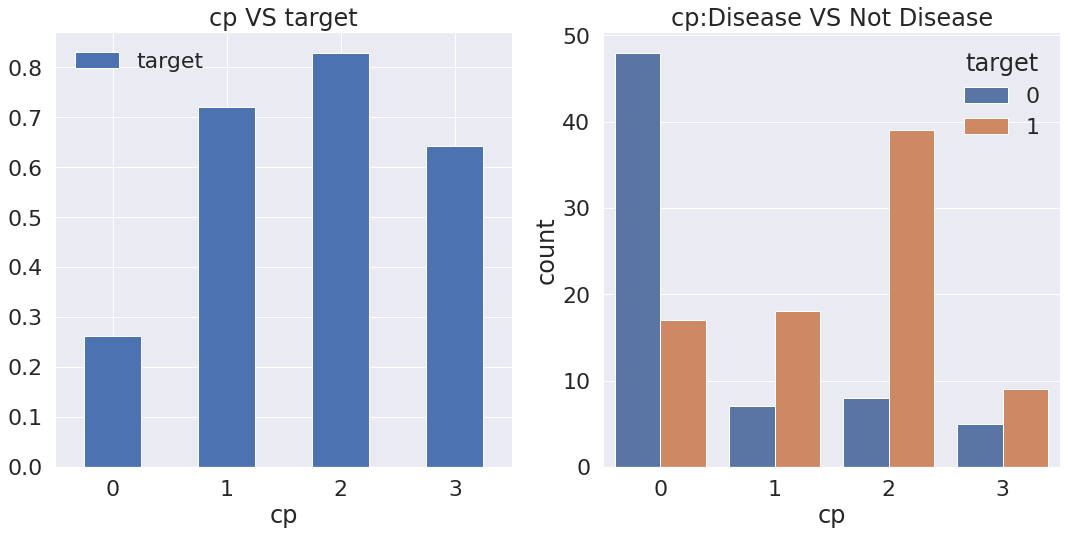

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
train[['cp', 'target']].groupby(['cp']).mean().plot.bar(ax=ax[0], rot=0)
ax[0].set_title('cp VS target')

sns.countplot('cp', hue='target', data=train, ax=ax[1])
ax[1].set_title('cp:Disease VS Not Disease')
plt.show()


1.  ***무증상***에서는 심장질환이 없다고 판단된 사람이 있다고 판단된 사람의 두배 이상 많습니다
 & target value의 평균값도 낮습니다

  ▶▶▶ 무증상인 사람이라면 <font color='green'>심장질환이 아닐</font> 확률이 <font color='purple'>매우 높다!!</font>  

2. ***협심증이 아닌 통증***에서는 심장질환이 있다고 판단된 사람이 없다고 판단된 사람의 약 4배정도 됩니다 & target value의 평균값도 높습니다

  ▶▶▶ 협심증이 아닌 통증인 사람이라면 <font color='red'>심장질환일</font> 확률이 <font color='purple'>매우 높다!!</font>

3.   ***일반적이지 않은 협심증***, ***일반적인 협심증***에서는 표본이 많이 없지만 그래도 심장질환이 있다고 판단된 사람이 없다고 판단된 사람에 비해 상대적으로 많음을 알 수 있습니다 & target value의 평균값도 높습니다

  ▶▶▶ 협심증인 사람이라면 <font color='red'>심장질환일</font> 확률이 <font color='purple'>높다!!</font>



***Let's check Sex & target***

여자 = 0, 남자 = 1

In [ ]:
pd.crosstab(train.sex, train.target, margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
sex,,,
0,13,35,48
1,55,48,103
All,68,83,151


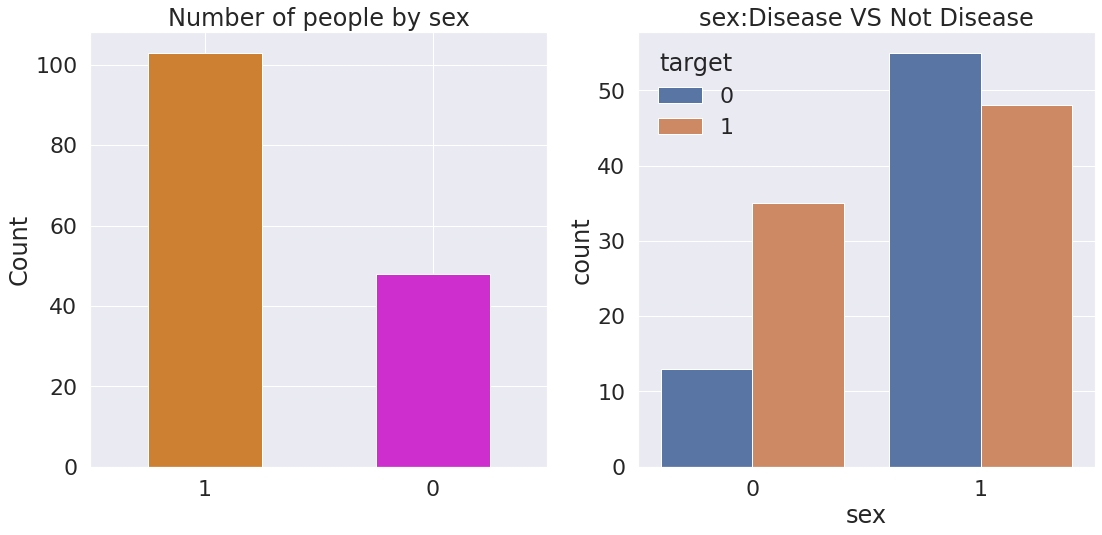

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
train['sex'].value_counts().plot.bar(color=['#CD7F32', '#CD2ECD', '#D31232'], ax=ax[0], rot=0)
ax[0].set_title('Number of people by sex')
ax[0].set_ylabel('Count')

sns.countplot('sex', hue='target', data=train, ax=ax[1])
ax[1].set_title('sex:Disease VS Not Disease')
plt.show()

* 남자의 수가 여자의 수보다 두배 이상 많다
* 여자들은 질환이 있는 사람이 없는 사람보다 훨씬 많다 
* 남자들은 질환이 있는 사람의 수와 없는 사람의 수가 비슷하다

▶▶▶ **여자**들은 **남자**들에 비해 심장질환에 <font color='purple'>취약한</font> 편이다

***let's see sex & cp & target***

In [ ]:
pd.crosstab([train.sex, train.target], train.cp, margins=True).style.background_gradient(cmap='summer_r')

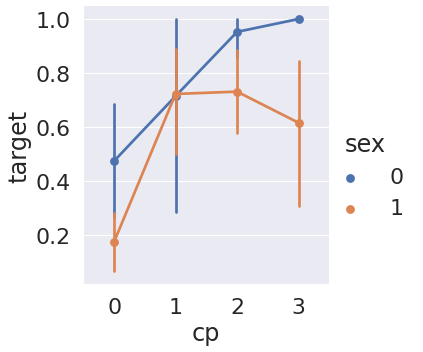

In [ ]:
sns.factorplot('cp', 'target', hue='sex', data=train)

1. **"cp에 상관없이"** ***여자***가 ***남자***보다 심장질환이 있을 확률이 높다고 판단됩니다..!

2. 여자의 경우 cp가 증가함에 따라 target value의 값도 올라간다(심장질환에 걸릴 확률이 증가한다)

***let's see age!***

In [ ]:
train['age'].describe()

count    151.000000
mean      54.496689
std        8.904586
min       34.000000
25%       48.500000
50%       54.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Text(0, 0.5, 'count')

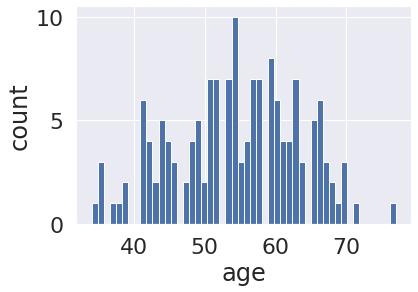

In [ ]:
train['age'].hist(bins=50)
plt.xlabel('age')
plt.ylabel('count')

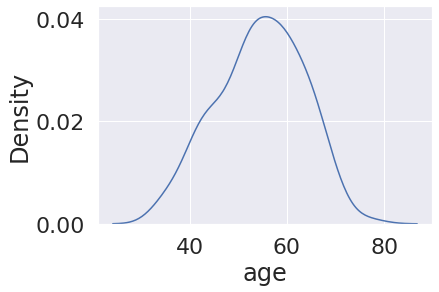

In [ ]:
sns.kdeplot(train['age'])

1. 정규분포에 근사하는 형태를 띔
2. 50~60세 사이의 연령대가 가장 많음

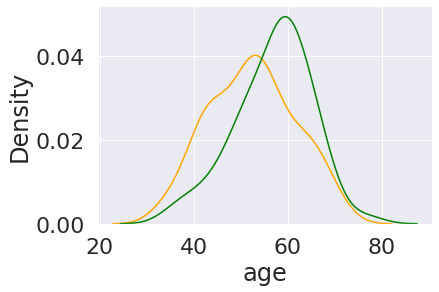

In [ ]:
sns.kdeplot(train.loc[train['target'] == 1, 'age'], color='orange')
sns.kdeplot(train.loc[train['target'] == 0, 'age'], color='green')

1. 심장질환에 걸린 사람들 중에서는 40~60이 주를 이룬다
2. 심장질환에 걸리지 않은 사람들 중에서는 60세 근방이 가장 많다

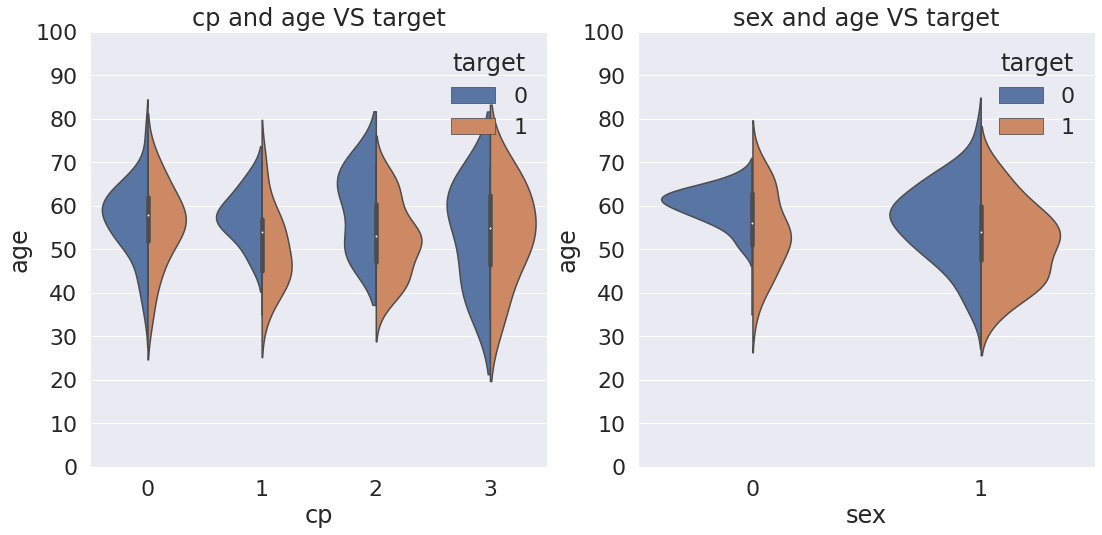

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('cp', 'age', hue='target', data=train, split=True, ax=ax[0])
ax[0].set_title('cp and age VS target')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('sex', 'age', hue='target', data=train, split=True, ax=ax[1])
ax[1].set_title('sex and age VS target')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

# 상관계수 분석 & 시각화

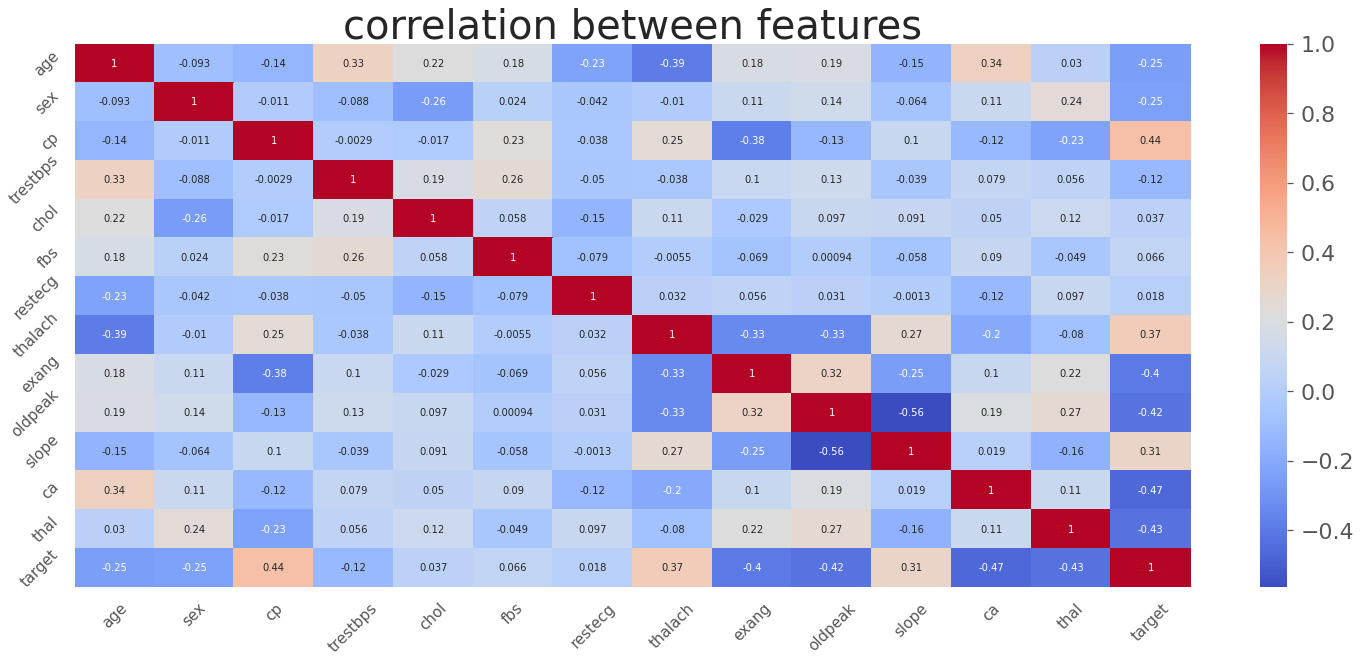

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize=(25,10))

heat_table = train.drop(['id'], axis=1).corr()
heatmap_ax = sns.heatmap(heat_table, annot=True,cmap='coolwarm')

heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15, rotation=45)

plt.title('correlation between features', fontsize=40)
plt.show()

# 단계적 회귀 (Stepwise Regression)

In [ ]:
corr_score = abs(heat_table.target[:-1])

In [ ]:
corr_score.sort_values()

restecg     0.017528
chol        0.036991
fbs         0.065821
trestbps    0.122850
sex         0.246289
age         0.247806
slope       0.305994
thalach     0.365249
exang       0.396145
oldpeak     0.421514
thal        0.428530
cp          0.436273
ca          0.466289
Name: target, dtype: float64

# Predictive Modeling

In [ ]:
# importing all the required ML packages
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

train, validation, test set 구분이 어렵다면? 아래 예시처럼 생각하시면 쉽게 이해하실 수 있을 것입니다!

* 축구 대표팀 훈련(training)

* 축구 대표팀 평가전(validation)

* 축구 대표팀 월드컵(test)


In [ ]:
train.head(2)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
1,2,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1


In [ ]:
train_sub, valid = train_test_split(train, test_size=0.2, random_state=2021, stratify= train['target'])
# Stratified sampling은 Random sampling과는 다른 샘플링 방식입니다
# Stratified sampling는 훈련데이터를 나눌 때 무작위로 샘플링을 하되, original dataset의 클래스 비율이 train, test set에서도 동일하게 유지되는 것을 보장한다는 점이 Random sampling과의 차이점입니다
# 분류문제에서는 이 비율이 유지되는 것이 굉장히 중요한데, original dataset에서 특정 클래스 비율이 불균형한 경우 stratify 매개변수에 타깃 데이터를 지정하여 호출하면 (어떠한 통계적 기법을 통해서) 이 비율이 유지될 수 있도록 샘플링합니다
# train의 target변수는 심각한 imbalance는 가지고 있지 않지만 약간의 imbalance가 있으므로 Stratified sampling을 진행했습니다
train_X = train_sub[train_sub.columns[1:-1]] 
train_Y = train_sub[train_sub.columns[-1]]
valid_X = valid[valid.columns[1:-1]]
valid_Y = valid[valid.columns[-1]]

X=train[train.columns[1:-1]]
Y=train['target']


❗***Stratified sampling***

'stratify= train['target']'로 인해서

아래 세가지 코드들로 보았을때 original train set의 'target'의 비율이 train_sub과 valid에 거의 비슷하게 적용되었음을 확인할 수 있다.

In [ ]:
train_sub['target'].value_counts() / train_sub.shape[0]

1    0.55
0    0.45
Name: target, dtype: float64

In [ ]:
valid['target'].value_counts() / valid.shape[0]

1    0.548387
0    0.451613
Name: target, dtype: float64

In [ ]:
train['target'].value_counts() / train.shape[0]

1    0.549669
0    0.450331
Name: target, dtype: float64

***prepare the data for best model***

In [ ]:
best_model_train_x = X.drop(["restecg","chol","fbs","trestbps"],axis=1)

In [ ]:
best_model_test = test.drop(["restecg","chol","fbs","trestbps"],axis=1)

## Logistic Regression

In [ ]:
model1 = LogisticRegression()
model1.fit(train_X, train_Y)

LogisticRegression()

#### f1_score by threshold




In [ ]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1 = (model1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred1)
    print(temp_thres, 'f1_score of LogisticRegression is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of LogisticRegression is 70.83%
0.01 f1_score of LogisticRegression is 77.27%
0.02 f1_score of LogisticRegression is 79.07%
0.03 f1_score of LogisticRegression is 80.95%
0.04 f1_score of LogisticRegression is 80.95%
0.05 f1_score of LogisticRegression is 80.95%
0.06 f1_score of LogisticRegression is 80.95%
0.07 f1_score of LogisticRegression is 80.95%
0.08 f1_score of LogisticRegression is 82.93%
0.09 f1_score of LogisticRegression is 82.93%
0.1 f1_score of LogisticRegression is 82.93%
0.11 f1_score of LogisticRegression is 82.93%
0.12 f1_score of LogisticRegression is 82.93%
0.13 f1_score of LogisticRegression is 87.18%
0.14 f1_score of LogisticRegression is 87.18%
0.15 f1_score of LogisticRegression is 87.18%
0.16 f1_score of LogisticRegression is 87.18%
0.17 f1_score of LogisticRegression is 87.18%
0.18 f1_score of LogisticRegression is 87.18%
0.19 f1_score of LogisticRegression is 87.18%
0.2 f1_score of LogisticRegression is 87.18%
0.21 f1_score of LogisticRegression i

Text(0, 0.5, 'f1 score')

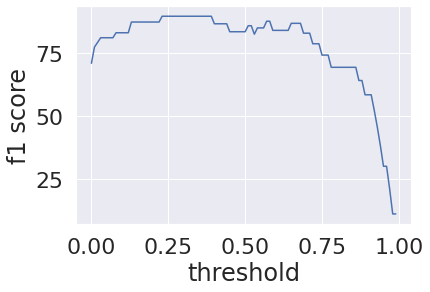

In [ ]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [ ]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

89.47368421052632
23


#### accuracy_score by threshold


In [ ]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1 = (model1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred1, valid_Y)
    print(temp_thres, 'Accuracy of LogisticRegression is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of LogisticRegression is 54.84%
0.01 Accuracy of LogisticRegression is 67.74%
0.02 Accuracy of LogisticRegression is 70.97%
0.03 Accuracy of LogisticRegression is 74.19%
0.04 Accuracy of LogisticRegression is 74.19%
0.05 Accuracy of LogisticRegression is 74.19%
0.06 Accuracy of LogisticRegression is 74.19%
0.07 Accuracy of LogisticRegression is 74.19%
0.08 Accuracy of LogisticRegression is 77.42%
0.09 Accuracy of LogisticRegression is 77.42%
0.1 Accuracy of LogisticRegression is 77.42%
0.11 Accuracy of LogisticRegression is 77.42%
0.12 Accuracy of LogisticRegression is 77.42%
0.13 Accuracy of LogisticRegression is 83.87%
0.14 Accuracy of LogisticRegression is 83.87%
0.15 Accuracy of LogisticRegression is 83.87%
0.16 Accuracy of LogisticRegression is 83.87%
0.17 Accuracy of LogisticRegression is 83.87%
0.18 Accuracy of LogisticRegression is 83.87%
0.19 Accuracy of LogisticRegression is 83.87%
0.2 Accuracy of LogisticRegression is 83.87%
0.21 Accuracy of LogisticRegression i

Text(0, 0.5, 'accuracy score')

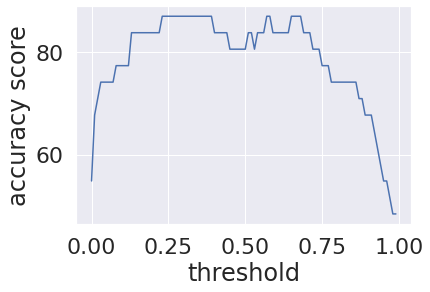

In [ ]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [ ]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
23


##### ***Prediction by Best threshold***

f1_score, accuracy_score 모두 threshold == 0.23 에서 가장 좋은 점수를 받았기 때문에 threshold == 0.23 을 가지고 test set 예측을 해보겠습니다

In [ ]:
model1.fit(X, Y)

LogisticRegression()

In [ ]:
test.drop('id', axis=1, inplace=True)

In [ ]:
test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
real_pred1 = (model1.predict_proba(test)[:,1] > 0.23).astype(int)

In [ ]:
submission['target'] = real_pred1
submission.to_csv('submission1.csv', index=False)

## LogisticRegression2

▶ ***solver controll***

In [ ]:
model1_1 = LogisticRegression(solver='liblinear', n_jobs=-1, random_state=2021)
model1_1.fit(train_X, train_Y)

LogisticRegression(n_jobs=-1, random_state=2021, solver='liblinear')

#### f1_score by threshold

In [ ]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1_1 = (model1_1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred1_1)
    print(temp_thres, 'f1_score of LogisticRegression2 is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of LogisticRegression2 is 70.83%
0.01 f1_score of LogisticRegression2 is 77.27%
0.02 f1_score of LogisticRegression2 is 79.07%
0.03 f1_score of LogisticRegression2 is 80.95%
0.04 f1_score of LogisticRegression2 is 80.95%
0.05 f1_score of LogisticRegression2 is 80.95%
0.06 f1_score of LogisticRegression2 is 80.95%
0.07 f1_score of LogisticRegression2 is 82.93%
0.08 f1_score of LogisticRegression2 is 82.93%
0.09 f1_score of LogisticRegression2 is 82.93%
0.1 f1_score of LogisticRegression2 is 82.93%
0.11 f1_score of LogisticRegression2 is 82.93%
0.12 f1_score of LogisticRegression2 is 85.00%
0.13 f1_score of LogisticRegression2 is 87.18%
0.14 f1_score of LogisticRegression2 is 87.18%
0.15 f1_score of LogisticRegression2 is 87.18%
0.16 f1_score of LogisticRegression2 is 87.18%
0.17 f1_score of LogisticRegression2 is 87.18%
0.18 f1_score of LogisticRegression2 is 87.18%
0.19 f1_score of LogisticRegression2 is 87.18%
0.2 f1_score of LogisticRegression2 is 87.18%
0.21 f1_score of

Text(0, 0.5, 'f1 score')

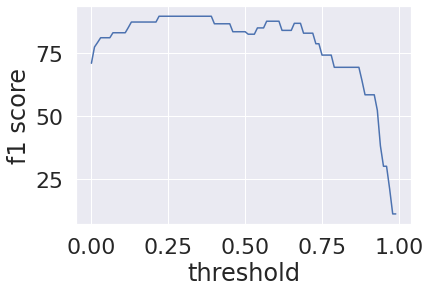

In [ ]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [ ]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

89.47368421052632
22


#### accuracy_score by threshold


In [ ]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred1_1 = (model1_1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred1_1, valid_Y)
    print(temp_thres, 'Accuracy of LogisticRegression2 is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of LogisticRegression2 is 54.84%
0.01 Accuracy of LogisticRegression2 is 67.74%
0.02 Accuracy of LogisticRegression2 is 70.97%
0.03 Accuracy of LogisticRegression2 is 74.19%
0.04 Accuracy of LogisticRegression2 is 74.19%
0.05 Accuracy of LogisticRegression2 is 74.19%
0.06 Accuracy of LogisticRegression2 is 74.19%
0.07 Accuracy of LogisticRegression2 is 77.42%
0.08 Accuracy of LogisticRegression2 is 77.42%
0.09 Accuracy of LogisticRegression2 is 77.42%
0.1 Accuracy of LogisticRegression2 is 77.42%
0.11 Accuracy of LogisticRegression2 is 77.42%
0.12 Accuracy of LogisticRegression2 is 80.65%
0.13 Accuracy of LogisticRegression2 is 83.87%
0.14 Accuracy of LogisticRegression2 is 83.87%
0.15 Accuracy of LogisticRegression2 is 83.87%
0.16 Accuracy of LogisticRegression2 is 83.87%
0.17 Accuracy of LogisticRegression2 is 83.87%
0.18 Accuracy of LogisticRegression2 is 83.87%
0.19 Accuracy of LogisticRegression2 is 83.87%
0.2 Accuracy of LogisticRegression2 is 83.87%
0.21 Accuracy of

Text(0, 0.5, 'accuracy score')

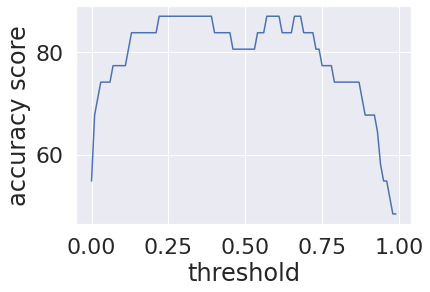

In [ ]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [ ]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
22


##### ***Prediction by Best threshold***

f1_score, accuracy_score 모두 threshold == 0.22, 0.58에서 가장 좋은 점수를 받았기 때문에 threshold == 0.22, 0.58을 가지고 test set 예측을 해보겠습니다

In [ ]:
model1_1.fit(X, Y)

LogisticRegression(n_jobs=-1, random_state=2021, solver='liblinear')

In [ ]:
real_pred3 = (model1_1.predict_proba(test)[:,1] > 0.22).astype(int)

In [ ]:
submission['target'] = real_pred3
submission.to_csv('submission3.csv', index=False)

In [ ]:
real_pred4 = (model1_1.predict_proba(test)[:,1] > 0.58).astype(int)

In [ ]:
submission['target'] = real_pred4
submission.to_csv('submission4.csv', index=False)

***predict by the best data***

In [ ]:
model1_1.fit(best_model_train_x, Y)
real_pred13 = model1_1.predict(best_model_test)

In [ ]:
submission['target'] = real_pred13
submission.to_csv('submission13.csv',index=False)

## Radial Support Vector Machines(rbf-SVM)

In [ ]:
model2 = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
model2.fit(train_X, train_Y)

SVC(C=1, gamma=0.1, probability=True)

#### f1_score by threshold

In [ ]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred2 = (model2.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred2)
    print(temp_thres, 'f1_score of rbf-svm is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of rbf-svm is 70.83%
0.01 f1_score of rbf-svm is 70.83%
0.02 f1_score of rbf-svm is 70.83%
0.03 f1_score of rbf-svm is 70.83%
0.04 f1_score of rbf-svm is 70.83%
0.05 f1_score of rbf-svm is 70.83%
0.06 f1_score of rbf-svm is 70.83%
0.07 f1_score of rbf-svm is 70.83%
0.08 f1_score of rbf-svm is 70.83%
0.09 f1_score of rbf-svm is 70.83%
0.1 f1_score of rbf-svm is 70.83%
0.11 f1_score of rbf-svm is 70.83%
0.12 f1_score of rbf-svm is 70.83%
0.13 f1_score of rbf-svm is 70.83%
0.14 f1_score of rbf-svm is 70.83%
0.15 f1_score of rbf-svm is 70.83%
0.16 f1_score of rbf-svm is 70.83%
0.17 f1_score of rbf-svm is 70.83%
0.18 f1_score of rbf-svm is 70.83%
0.19 f1_score of rbf-svm is 70.83%
0.2 f1_score of rbf-svm is 70.83%
0.21 f1_score of rbf-svm is 70.83%
0.22 f1_score of rbf-svm is 70.83%
0.23 f1_score of rbf-svm is 70.83%
0.24 f1_score of rbf-svm is 70.83%
0.25 f1_score of rbf-svm is 70.83%
0.26 f1_score of rbf-svm is 70.83%
0.27 f1_score of rbf-svm is 70.83%
0.28 f1_score of rbf-sv

Text(0, 0.5, 'f1 score')

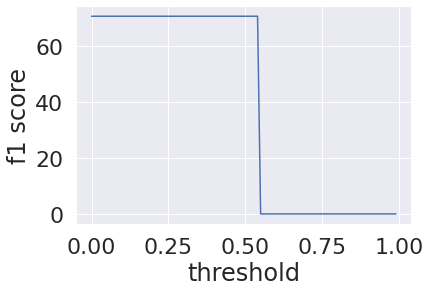

In [ ]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [ ]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

70.83333333333333
0


#### accuracy_score by threshold

In [ ]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred2 = (model2.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred2, valid_Y)
    print(temp_thres, 'Accuracy of rbf-svm is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of rbf-svm is 54.84%
0.01 Accuracy of rbf-svm is 54.84%
0.02 Accuracy of rbf-svm is 54.84%
0.03 Accuracy of rbf-svm is 54.84%
0.04 Accuracy of rbf-svm is 54.84%
0.05 Accuracy of rbf-svm is 54.84%
0.06 Accuracy of rbf-svm is 54.84%
0.07 Accuracy of rbf-svm is 54.84%
0.08 Accuracy of rbf-svm is 54.84%
0.09 Accuracy of rbf-svm is 54.84%
0.1 Accuracy of rbf-svm is 54.84%
0.11 Accuracy of rbf-svm is 54.84%
0.12 Accuracy of rbf-svm is 54.84%
0.13 Accuracy of rbf-svm is 54.84%
0.14 Accuracy of rbf-svm is 54.84%
0.15 Accuracy of rbf-svm is 54.84%
0.16 Accuracy of rbf-svm is 54.84%
0.17 Accuracy of rbf-svm is 54.84%
0.18 Accuracy of rbf-svm is 54.84%
0.19 Accuracy of rbf-svm is 54.84%
0.2 Accuracy of rbf-svm is 54.84%
0.21 Accuracy of rbf-svm is 54.84%
0.22 Accuracy of rbf-svm is 54.84%
0.23 Accuracy of rbf-svm is 54.84%
0.24 Accuracy of rbf-svm is 54.84%
0.25 Accuracy of rbf-svm is 54.84%
0.26 Accuracy of rbf-svm is 54.84%
0.27 Accuracy of rbf-svm is 54.84%
0.28 Accuracy of rbf-sv

Text(0, 0.5, 'accuracy score')

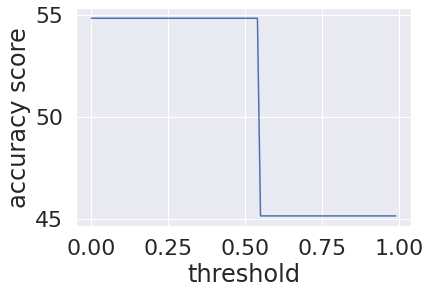

In [ ]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [ ]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

54.83870967741935
0


## Gaussian Naive Bayes

In [ ]:
model3 = GaussianNB()
model3.fit(train_X, train_Y)

GaussianNB()

#### f1_score by threshold

In [ ]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred3 = (model3.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred3)
    print(temp_thres, 'f1_score of GNB is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of GNB is 70.83%
0.01 f1_score of GNB is 80.00%
0.02 f1_score of GNB is 80.00%
0.03 f1_score of GNB is 78.95%
0.04 f1_score of GNB is 78.95%
0.05 f1_score of GNB is 77.78%
0.06 f1_score of GNB is 77.78%
0.07 f1_score of GNB is 82.35%
0.08 f1_score of GNB is 78.79%
0.09 f1_score of GNB is 78.79%
0.1 f1_score of GNB is 78.79%
0.11 f1_score of GNB is 78.79%
0.12 f1_score of GNB is 75.00%
0.13 f1_score of GNB is 75.00%
0.14 f1_score of GNB is 75.00%
0.15 f1_score of GNB is 75.00%
0.16 f1_score of GNB is 75.00%
0.17 f1_score of GNB is 75.00%
0.18 f1_score of GNB is 75.00%
0.19 f1_score of GNB is 77.42%
0.2 f1_score of GNB is 77.42%
0.21 f1_score of GNB is 77.42%
0.22 f1_score of GNB is 77.42%
0.23 f1_score of GNB is 77.42%
0.24 f1_score of GNB is 77.42%
0.25 f1_score of GNB is 73.33%
0.26 f1_score of GNB is 73.33%
0.27 f1_score of GNB is 73.33%
0.28 f1_score of GNB is 73.33%
0.29 f1_score of GNB is 73.33%
0.3 f1_score of GNB is 73.33%
0.31 f1_score of GNB is 73.33%
0.32 f1_scor

Text(0, 0.5, 'f1 score')

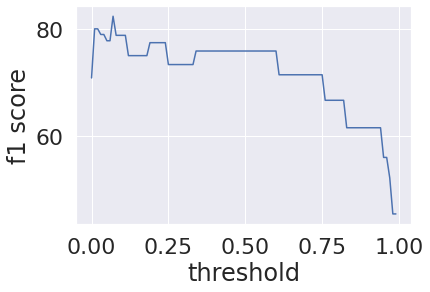

In [ ]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [ ]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

82.35294117647058
7


#### accuracy_score by threshold

In [ ]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred3 = (model3.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred3, valid_Y)
    print(temp_thres, 'Accuracy of GNB is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of GNB is 54.84%
0.01 Accuracy of GNB is 74.19%
0.02 Accuracy of GNB is 74.19%
0.03 Accuracy of GNB is 74.19%
0.04 Accuracy of GNB is 74.19%
0.05 Accuracy of GNB is 74.19%
0.06 Accuracy of GNB is 74.19%
0.07 Accuracy of GNB is 80.65%
0.08 Accuracy of GNB is 77.42%
0.09 Accuracy of GNB is 77.42%
0.1 Accuracy of GNB is 77.42%
0.11 Accuracy of GNB is 77.42%
0.12 Accuracy of GNB is 74.19%
0.13 Accuracy of GNB is 74.19%
0.14 Accuracy of GNB is 74.19%
0.15 Accuracy of GNB is 74.19%
0.16 Accuracy of GNB is 74.19%
0.17 Accuracy of GNB is 74.19%
0.18 Accuracy of GNB is 74.19%
0.19 Accuracy of GNB is 77.42%
0.2 Accuracy of GNB is 77.42%
0.21 Accuracy of GNB is 77.42%
0.22 Accuracy of GNB is 77.42%
0.23 Accuracy of GNB is 77.42%
0.24 Accuracy of GNB is 77.42%
0.25 Accuracy of GNB is 74.19%
0.26 Accuracy of GNB is 74.19%
0.27 Accuracy of GNB is 74.19%
0.28 Accuracy of GNB is 74.19%
0.29 Accuracy of GNB is 74.19%
0.3 Accuracy of GNB is 74.19%
0.31 Accuracy of GNB is 74.19%
0.32 Accurac

Text(0, 0.5, 'accuracy score')

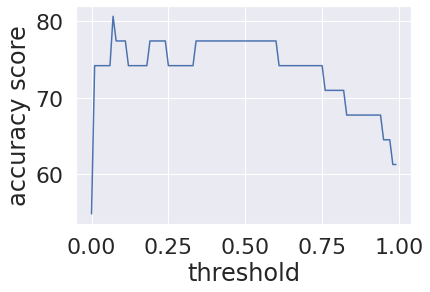

In [ ]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [ ]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

80.64516129032258
7


## RandomForest

In [ ]:
model4 = RandomForestClassifier(n_estimators=200)
model4.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=200)

#### f1_score by threshold

In [ ]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred4 = (model4.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred4)
    print(temp_thres, 'f1_score of RF is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of RF is 70.83%
0.01 f1_score of RF is 70.83%
0.02 f1_score of RF is 70.83%
0.03 f1_score of RF is 72.34%
0.04 f1_score of RF is 75.56%
0.05 f1_score of RF is 75.56%
0.06 f1_score of RF is 75.56%
0.07 f1_score of RF is 75.56%
0.08 f1_score of RF is 75.56%
0.09 f1_score of RF is 75.56%
0.1 f1_score of RF is 75.56%
0.11 f1_score of RF is 79.07%
0.12 f1_score of RF is 79.07%
0.13 f1_score of RF is 79.07%
0.14 f1_score of RF is 79.07%
0.15 f1_score of RF is 79.07%
0.16 f1_score of RF is 80.95%
0.17 f1_score of RF is 80.95%
0.18 f1_score of RF is 80.95%
0.19 f1_score of RF is 80.95%
0.2 f1_score of RF is 82.93%
0.21 f1_score of RF is 82.93%
0.22 f1_score of RF is 85.00%
0.23 f1_score of RF is 85.00%
0.24 f1_score of RF is 85.00%
0.25 f1_score of RF is 85.00%
0.26 f1_score of RF is 87.18%
0.27 f1_score of RF is 87.18%
0.28 f1_score of RF is 87.18%
0.29 f1_score of RF is 87.18%
0.3 f1_score of RF is 89.47%
0.31 f1_score of RF is 89.47%
0.32 f1_score of RF is 89.47%
0.33 f1_score 

Text(0, 0.5, 'f1 score')

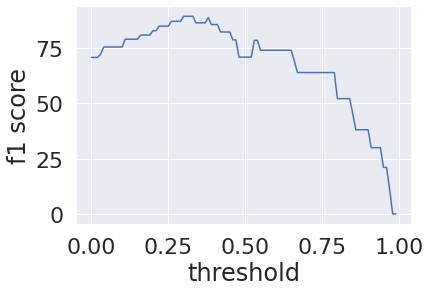

In [ ]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [ ]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

89.47368421052632
30



#### accuracy_score by threshold

In [ ]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred4 = (model4.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred4, valid_Y)
    print(temp_thres, 'Accuracy of RF is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of RF is 54.84%
0.01 Accuracy of RF is 54.84%
0.02 Accuracy of RF is 54.84%
0.03 Accuracy of RF is 58.06%
0.04 Accuracy of RF is 64.52%
0.05 Accuracy of RF is 64.52%
0.06 Accuracy of RF is 64.52%
0.07 Accuracy of RF is 64.52%
0.08 Accuracy of RF is 64.52%
0.09 Accuracy of RF is 64.52%
0.1 Accuracy of RF is 64.52%
0.11 Accuracy of RF is 70.97%
0.12 Accuracy of RF is 70.97%
0.13 Accuracy of RF is 70.97%
0.14 Accuracy of RF is 70.97%
0.15 Accuracy of RF is 70.97%
0.16 Accuracy of RF is 74.19%
0.17 Accuracy of RF is 74.19%
0.18 Accuracy of RF is 74.19%
0.19 Accuracy of RF is 74.19%
0.2 Accuracy of RF is 77.42%
0.21 Accuracy of RF is 77.42%
0.22 Accuracy of RF is 80.65%
0.23 Accuracy of RF is 80.65%
0.24 Accuracy of RF is 80.65%
0.25 Accuracy of RF is 80.65%
0.26 Accuracy of RF is 83.87%
0.27 Accuracy of RF is 83.87%
0.28 Accuracy of RF is 83.87%
0.29 Accuracy of RF is 83.87%
0.3 Accuracy of RF is 87.10%
0.31 Accuracy of RF is 87.10%
0.32 Accuracy of RF is 87.10%
0.33 Accuracy 

Text(0, 0.5, 'accuracy score')

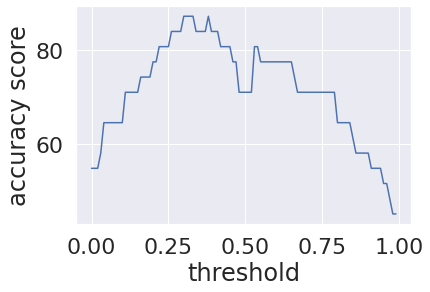

In [ ]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [ ]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
30


##### ***Prediction by Best threshold***

f1_score, accuracy_score 모두 threshold == 0.34 에서 가장 좋은 점수를 받았기 때문에 threshold == 0.34 을 가지고 test set 예측을 해보겠습니다

In [ ]:
model4.fit(X, Y)

RandomForestClassifier(n_estimators=200)

In [ ]:
real_pred2 = (model4.predict_proba(test)[:,1] > 0.34).astype(int)

In [ ]:
submission['target'] = real_pred2
submission.to_csv('submission2.csv', index=False)

## HyperParameters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

### RandomForest

In [ ]:
n_estimators=range(100, 1000, 100)
hyper={'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True, n_jobs=-1)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_estimator_.get_params())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8210752688172043
RandomForestClassifier(random_state=0)
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


***modeling by using best parameters***

In [ ]:
best_params = gd.best_estimator_.get_params()
RF_best_params = RandomForestClassifier(**best_params)

In [ ]:
RF_best_params.fit(best_model_train_x,Y)

RandomForestClassifier(random_state=0)

In [ ]:
pred_best_rf = RF_best_params.predict(best_model_test)

In [ ]:
submission['target'] = pred_best_rf
submission.to_csv('rf_best_params-2.csv', index=False)

## Model Ensemble

* ***Ensembling*** is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

#### Voting Classifier

* It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types. 

***basic_rf + LogisticRegression(solver='liblinear')***



In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
eclf1 = VotingClassifier(estimators=[('rf', model4), ('logistic2', model1_1)],
                         voting='soft')
eclf1 = eclf1.fit(best_model_train_x,Y)

In [ ]:
real_pred5 = eclf1.predict(best_model_test)

In [ ]:
submission['target'] = real_pred5
submission.to_csv('submission5-1.csv', index=False)

***rf_best_params + LogisticRegression(solver='liblinear')***

In [ ]:
eclf1_1 = VotingClassifier(estimators=[('rf_best_params', RF_best_params), ('logistic2', model1_1)],
                           voting='soft')

In [ ]:
eclf1_1.fit(train_X, train_Y)

VotingClassifier(estimators=[('rf_best_params',
                              RandomForestClassifier(random_state=0)),
                             ('logistic2',
                              LogisticRegression(n_jobs=-1, random_state=2021,
                                                 solver='liblinear'))],
                 voting='soft')

In [ ]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred6 = (eclf1_1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred6)
    print(temp_thres, 'f1_score of Voting2 is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

Text(0, 0.5, 'f1 score')

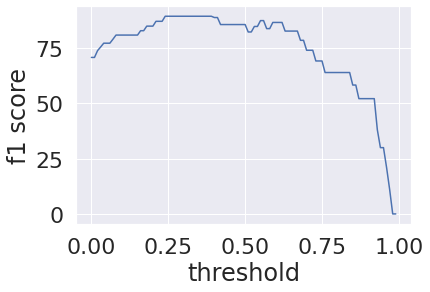

In [ ]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [ ]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

89.47368421052632
24


In [ ]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred6 = (eclf1_1.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred6, valid_Y)
    print(temp_thres, 'Accuracy of Voting2 is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

Text(0, 0.5, 'accuracy score')

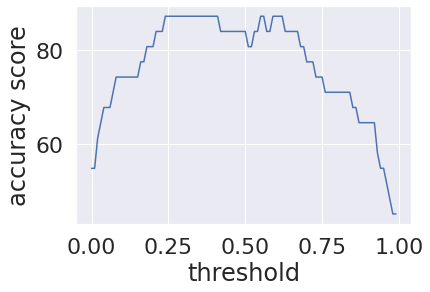

In [ ]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [ ]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
24



***Prediction by Best threshold***

f1_score, accuracy_score 모두 threshold == 0.24 에서 가장 좋은 점수를 받았기 때문에 threshold == 0.24 을 가지고 test set 예측을 해보겠습니다

In [ ]:
eclf1_1 = eclf1_1.fit(X,Y)

In [ ]:
real_pred8 = (eclf1_1.predict_proba(test)[:,1] > 0.24).astype(int)

In [ ]:
submission['target'] = real_pred8
submission.to_csv('submission8.csv', index=False)

***Not thresholding***

In [ ]:
eclf1_1 = eclf1_1.fit(X,Y)

In [ ]:
real_pred9 = eclf1_1.predict(test)

In [ ]:
submission['target'] = real_pred9
submission.to_csv('submission9.csv', index=False)

***Combining the Models***

In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1_2 = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RFor',model4),
                                              ('LR',model1_1),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',model3),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X, Y)

In [ ]:
real_pred12 = eclf1_2.predict(test)

In [ ]:
submission['target'] = real_pred12
submission.to_csv('submission12.csv', index=False)

##### Lightgbm

In [ ]:
import lightgbm as lgbm
eclf2 = lgbm.LGBMClassifier()
eclf2.fit(X,Y)

LGBMClassifier()

In [ ]:
real_pred6 = eclf2.predict(test)

In [ ]:
submission['target'] = real_pred6
submission.to_csv('submission6.csv', index=False)

##### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
eclf2_1 = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
eclf2_1.fit(X,Y)

AdaBoostClassifier(learning_rate=0.05, n_estimators=200, random_state=0)

In [ ]:
real_pred10 = eclf2_1.predict(test)

In [ ]:
submission['target'] = real_pred10
submission.to_csv('submission10.csv', index=False)

##### XGBoost

In [ ]:
import xgboost as xg
eclf2_2 = xg.XGBClassifier(n_estimators=900, learning_rate=0.1, random_state=0)
eclf2_2.fit(X,Y)

XGBClassifier(n_estimators=900)

In [ ]:
real_pred11 = eclf2_2.predict(test)

In [ ]:
submission['target'] = real_pred11
submission.to_csv('submission11.csv', index=False)

#### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
eclf3 = StackingClassifier(estimators=[('rf', model4), ('lgbm', eclf2)], 
                           final_estimator=model1_1,
                           n_jobs=-1,
                           stack_method='predict',
                           cv=5)

In [ ]:
eclf3.fit(train_X, train_Y)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                               ('lgbm', LGBMClassifier())],
                   final_estimator=LogisticRegression(n_jobs=-1,
                                                      random_state=2021,
                                                      solver='liblinear'),
                   n_jobs=-1, stack_method='predict')

***f1_score by threshold***

In [ ]:
f1_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred5 = (eclf3.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_f1_score = 100*f1_score(valid_Y, pred5)
    print(temp_thres, 'f1_score of Stacking is {:.2f}%'.format(temp_f1_score))
    f1_score_array.append(temp_f1_score)

0.0 f1_score of Stacking is 70.83%
0.01 f1_score of Stacking is 70.83%
0.02 f1_score of Stacking is 70.83%
0.03 f1_score of Stacking is 70.83%
0.04 f1_score of Stacking is 70.83%
0.05 f1_score of Stacking is 70.83%
0.06 f1_score of Stacking is 70.83%
0.07 f1_score of Stacking is 70.83%
0.08 f1_score of Stacking is 70.83%
0.09 f1_score of Stacking is 70.83%
0.1 f1_score of Stacking is 70.83%
0.11 f1_score of Stacking is 70.83%
0.12 f1_score of Stacking is 70.83%
0.13 f1_score of Stacking is 70.83%
0.14 f1_score of Stacking is 70.83%
0.15 f1_score of Stacking is 70.83%
0.16 f1_score of Stacking is 70.83%
0.17 f1_score of Stacking is 70.83%
0.18 f1_score of Stacking is 70.83%
0.19 f1_score of Stacking is 70.83%
0.2 f1_score of Stacking is 70.83%
0.21 f1_score of Stacking is 70.83%
0.22 f1_score of Stacking is 70.83%
0.23 f1_score of Stacking is 70.83%
0.24 f1_score of Stacking is 87.50%
0.25 f1_score of Stacking is 87.50%
0.26 f1_score of Stacking is 87.50%
0.27 f1_score of Stacking is 87

Text(0, 0.5, 'f1 score')

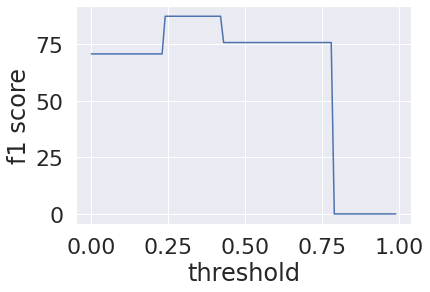

In [ ]:
plt.plot(np.arange(0,1,0.01), f1_score_array)

plt.xlabel('threshold')
plt.ylabel('f1 score')

In [ ]:
print(np.max(f1_score_array))
print(np.argmax(f1_score_array))

87.49999999999999
24


***accuracy_score by threshold***

In [ ]:
acc_score_array = []

for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    pred5 = (eclf3.predict_proba(valid_X)[:,1] > threshold).astype(int)
    temp_acc_score = 100*metrics.accuracy_score(pred5, valid_Y)
    print(temp_thres, 'Accuracy of Stacking is {:.2f}%'.format(temp_acc_score))
    acc_score_array.append(temp_acc_score)

0.0 Accuracy of Stacking is 54.84%
0.01 Accuracy of Stacking is 54.84%
0.02 Accuracy of Stacking is 54.84%
0.03 Accuracy of Stacking is 54.84%
0.04 Accuracy of Stacking is 54.84%
0.05 Accuracy of Stacking is 54.84%
0.06 Accuracy of Stacking is 54.84%
0.07 Accuracy of Stacking is 54.84%
0.08 Accuracy of Stacking is 54.84%
0.09 Accuracy of Stacking is 54.84%
0.1 Accuracy of Stacking is 54.84%
0.11 Accuracy of Stacking is 54.84%
0.12 Accuracy of Stacking is 54.84%
0.13 Accuracy of Stacking is 54.84%
0.14 Accuracy of Stacking is 54.84%
0.15 Accuracy of Stacking is 54.84%
0.16 Accuracy of Stacking is 54.84%
0.17 Accuracy of Stacking is 54.84%
0.18 Accuracy of Stacking is 54.84%
0.19 Accuracy of Stacking is 54.84%
0.2 Accuracy of Stacking is 54.84%
0.21 Accuracy of Stacking is 54.84%
0.22 Accuracy of Stacking is 54.84%
0.23 Accuracy of Stacking is 54.84%
0.24 Accuracy of Stacking is 87.10%
0.25 Accuracy of Stacking is 87.10%
0.26 Accuracy of Stacking is 87.10%
0.27 Accuracy of Stacking is 87

Text(0, 0.5, 'accuracy score')

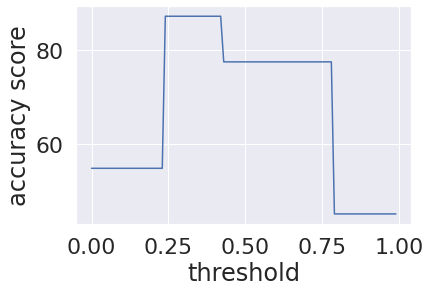

In [ ]:
plt.plot(np.arange(0,1,0.01), acc_score_array)

plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [ ]:
print(np.max(acc_score_array))
print(np.argmax(acc_score_array))

87.09677419354838
24


***Prediction by Best threshold***

f1_score, accuracy_score 모두 threshold == 0.23 에서 가장 좋은 점수를 받았기 때문에 threshold == 0.23 을 가지고 test set 예측을 해보겠습니다

In [ ]:
eclf3 = eclf3.fit(X,Y)

In [ ]:
real_pred7 = (eclf3.predict_proba(test)[:,1] > 0.23).astype(int)

In [ ]:
submission['target'] = real_pred7
submission.to_csv('submission7.csv', index=False)

# 추후 더 해봐야 할 것들
1. EDA를 진행하지 않은 Feature들을 더 분석할 필요가 있다 ---> 강력한 insight를 찾는다
2. feature들과 target사이의 관계를 파악하여 더 좋은 모델을 만든다
3. feature들을 가공해서 학습에 도움이 될 수 있게 만든다